# Context:
The data set has information about features of silhouette extracted from the images of different cars
Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 
cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars 
would be readily distinguishable, but it would be more difficult to distinguish between the cars.

Here let's apply both Hierarchial and K-Means Clustering.

# Import the necessary libraries and load the dataset.

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In C:\Users\King\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\King\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\King\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\King\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\King\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle

In [2]:
df = pd.read_csv("bank_marketing_part1_Data-1.csv")
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


# Q1. Check for missing values in the dataset.

In [3]:
df.isna().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

# Q2. Drop the missing values.
### Note: [Use the dataset thus created after dropping missing values for the clustering algorithms.]

In [4]:
df = df.dropna()

In [5]:
df.isna().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

# Q3. Check the shape (rows and columns), info and the basic measures of descriptive statistics from the data.

In [6]:
print('The number of rows of the dataframe is',df.shape[0],'.')

print('The number of columns of the dataframe is',df.shape[1],'.')

The number of rows of the dataframe is 210 .
The number of columns of the dataframe is 7 .


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 13.1 KB


In [8]:
df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


# Q4. Print/Plot the dependent (categorical variable) and Check for any missing values in the data

In [9]:
#Since the variable is categorical, you can use value_counts function
pd.value_counts(df['class'])

KeyError: 'class'

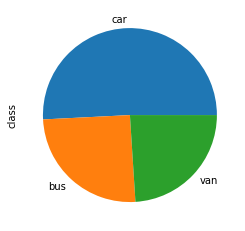

In [10]:
pd.value_counts(df["class"]).plot(kind="pie")
plt.show()

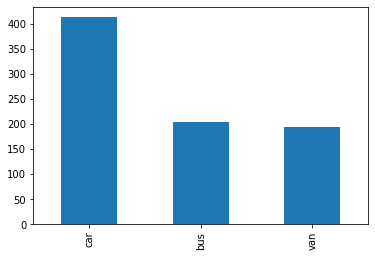

In [11]:
pd.value_counts(df["class"]).plot(kind="bar")
plt.show()

# Q4. Standardize the data.

In [9]:
DF = df

In [10]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler()
scaled_DF = X.fit_transform(DF)
scaled_DF

array([[ 1.75435461,  1.81196782,  0.17822987, ...,  1.33857863,
        -0.29880602,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.501773  , ...,  0.85823561,
        -0.24280501, -0.53858174],
       [ 1.41330028,  1.42819249,  0.50487353, ...,  1.317348  ,
        -0.22147129,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36488339, ..., -0.15287318,
        -1.3221578 , -0.83023461],
       [ 0.43836719,  0.33827054,  1.23027698, ...,  0.60081421,
        -0.95348449,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77624835, ..., -0.07325831,
        -0.70681338,  0.96047321]])

In [11]:
scaled_DF = pd.DataFrame(scaled_DF, index=DF.index, columns=DF.columns)
scaled_DF.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


Drop the categorical variable before clustering the data.

# Q5. Perform Hierarchical Clustering with the Ward's linkage method and plot the dendrogram.
#### Note: Please do go ahead and explore other parameters under the linkage function in the Scientific Python library. 

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [13]:
HClust = linkage(scaled_DF, method = 'ward')

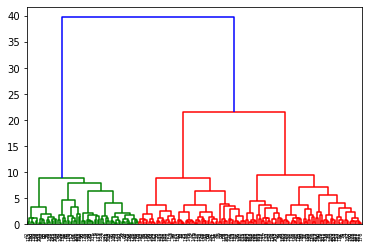

In [14]:
dend = dendrogram(HClust)

# Q6. Plot the truncated dendrogram with the last 25 clusters.

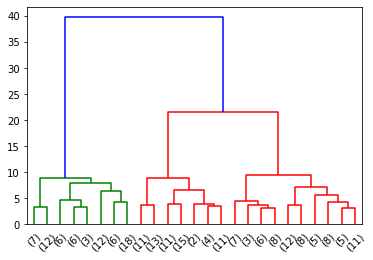

In [15]:
dend = dendrogram(HClust,
                 truncate_mode='lastp',
                 p = 25,# we are looking at the last 25 merges
                 )

# Q7. Identify the number of clusters based on the dendrogram and add the cluster numbers to the original dataframe.

In [16]:
from scipy.cluster.hierarchy import fcluster

In [17]:
#Method 1

clusters_1 = fcluster(HClust, 2, criterion='maxclust')
clusters_1

array([1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2], dtype=int32)

In [18]:
# Method 2

clusters_2 = fcluster(HClust, 60, criterion='distance')
clusters_2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [40]:
np.array_equal(clusters_1,clusters_2)

False

In [41]:
DF['H_clusters'] = clusters_1
DF.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,H_clusters,Kmeans_clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,0
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1


# Q8. Export the dataframe thus created with the clusters into a csv file.

In [42]:
df.to_csv('H_Cluster.csv')

# Q9. Perform the K-Means clustering with 2 clusters.

In [43]:
from sklearn.cluster import KMeans 

In [44]:
k_means2 = KMeans(n_clusters = 2,random_state=1)
k_means2.fit(scaled_DF)
k_means2.labels_

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1])

# Q10. Find out the within cluster sum of squares for 2 clusters for the K-Means algorithm.

In [45]:
k_means2.inertia_

659.171754487041

# Q11. Perform the K-Means clustering with 3 clusters and find out the within cluster sum of squares.

In [46]:
k_means3 = KMeans(n_clusters = 3,random_state=1)
k_means3.fit(scaled_DF)
k_means3.inertia_

430.6589731513006

# Q13. Find the Within Sum of Squares (WSS) for 2 to 15 clusters.

In [47]:
wss =[] 

In [48]:
for i in range(1,15):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(scaled_DF)
    wss.append(KM.inertia_)
wss

[1469.9999999999998,
 659.171754487041,
 430.6589731513006,
 371.38509060801096,
 327.21278165661346,
 289.31599538959495,
 262.98186570162267,
 241.81894656086033,
 223.91254221002725,
 206.39612184786694,
 193.2835133180646,
 182.97995389115258,
 175.11842017053073,
 166.02965682631788]

# Q14. Plot the Within Sum of Squares (WSS) plot using the values of 'inertia' computed in the last question.

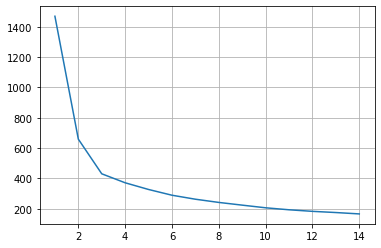

In [49]:
plt.plot(range(1,15), wss)
plt.grid()
plt.show()

# Q15. Find the optimum number of clusters from the WSS plot in the previous question.

In [62]:
k_means = KMeans(n_clusters = 2,random_state=1)
k_means.fit(scaled_DF)
labels = k_means.labels_
labels

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1])

In [63]:
k_means4 = KMeans(n_clusters = 4,random_state=1)
k_means4.fit(scaled_DF)
labels_4 = k_means4.labels_
labels_4

array([3, 1, 3, 0, 3, 0, 0, 1, 3, 0, 3, 1, 0, 3, 1, 0, 1, 0, 1, 0, 0, 0,
       3, 0, 1, 2, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 3, 3, 1, 2, 3,
       0, 0, 1, 3, 3, 3, 0, 3, 3, 3, 3, 2, 0, 0, 0, 3, 1, 0, 0, 2, 1, 3,
       3, 1, 3, 1, 1, 0, 3, 3, 0, 3, 1, 0, 2, 1, 1, 1, 1, 3, 0, 2, 2, 2,
       2, 0, 1, 3, 1, 0, 1, 3, 3, 2, 0, 2, 1, 3, 2, 3, 1, 3, 3, 0, 1, 3,
       2, 1, 3, 0, 0, 2, 1, 1, 0, 3, 1, 0, 0, 0, 1, 1, 3, 0, 1, 1, 0, 1,
       1, 3, 0, 3, 3, 0, 2, 1, 2, 1, 0, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1, 2,
       0, 1, 1, 0, 1, 2, 3, 0, 3, 2, 3, 0, 2, 1, 1, 0, 1, 0, 1, 3, 3, 3,
       1, 1, 2, 0, 1, 1, 1, 1, 2, 2, 1, 2, 1, 0, 1, 1, 0, 3, 1, 2, 3, 0,
       3, 0, 1, 2, 1, 0, 2, 1, 2, 1, 2, 2])

# Q16. Check the average silhouette score and silhouette width of the cluster(s) thus created.

In [52]:
DF_Kmeans = DF.drop('H_clusters',axis=1)

In [53]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [54]:
silhouette_score(scaled_DF,labels)

0.46577247686580914

In [55]:
silhouette_samples(scaled_DF,labels).min()     

-0.006171238927461077

In [56]:
silhouette_score(scaled_DF,labels_4)

0.3276547677266193

In [57]:
silhouette_samples(scaled_DF,labels_4).min()

-0.05384082699360047

# Q17. Add the cluster labels to the dataset which has the cluster labels of Hierarchical Clustering.

In [81]:
DF['Kmeans_clusters'] = labels_4

In [82]:
DF.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,H_clusters,Kmeans_clusters,k_means4
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,3,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2,1,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,3,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,0,0
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,3,1


# Q18. Export the new dataframe with both the cluster labels of Hierarchical Clustering and K-Means clustering into a csv. Do not include the 'class' variable in this particular dataframe. 

In [83]:
DF.to_csv('Cluster.csv')

### Cluster profile

In [87]:
clust_profile=DF.drop(['H_clusters'],axis=1)
clust_profile=DF.groupby('Kmeans_clusters').mean()
clust_profile['freq']=DF.Kmeans_clusters.value_counts().sort_index()
clust_profile

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,H_clusters,k_means4,freq
Kmeans_clusters,,,,,,,,,,
0,11.816462,13.242154,0.846060,5.237600,2.834354,4.919415,5.121846,2.0,0.000000,65
1,13.992576,14.114697,0.881241,5.431939,3.213318,2.591624,5.030470,2.0,0.045455,66
2,16.317333,15.288000,0.876877,5.864800,3.444433,3.868567,5.686533,1.3,0.833333,30
3,19.120000,16.459184,0.886686,6.267265,3.768612,3.472980,6.125878,1.0,1.000000,49
